# THE SPARKS FOUNDATION

## Task 1 - Prediction using Supervised ML

To Predict the percentage of marks of the students based on the number of hours they studied.

### Author - Vaibhav Channe

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
# Reading the data
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# Chaeck data type
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# Chaeck if there any null value in the Dataset
data.isnull == True

False

#### There is no null value in Dataset so, we can visualize the data

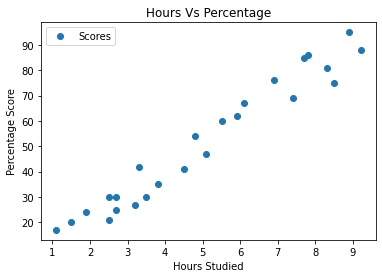

In [8]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

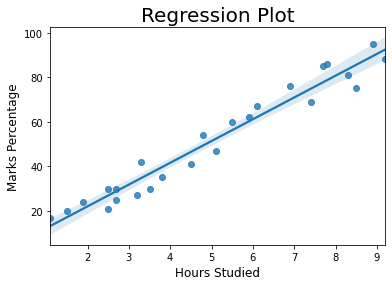

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x = data["Hours"], y = data["Scores"])
plt.title("Regression Plot", size = 20)
plt.ylabel("Marks Percentage", size = 12)
plt.xlabel("Hours Studied", size = 12)
plt.show()
print(data.corr())

#### Training the Model

##### 1) Splitting the data

In [9]:
# Defining x and y from the data
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Splitting the data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

##### 2) Fitting the data into the Model

In [10]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model Trained")

Model Trained


In [11]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({"Hours": [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


##### Comparing the Predicted Marks with the Actual Marks

In [12]:
compare_scores = pd.DataFrame({"Actual Marks": val_y, "Predicted Marks": pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


##### Visually Comparing the predicted Marks with the Actual Marks

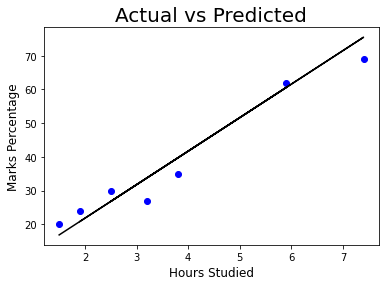

In [13]:
plt.scatter(x=val_x, y=val_y, color="blue")
plt.plot(val_x, pred_y, color="Black")
plt.title("Actual vs Predicted", size=20)
plt.ylabel("Marks Percentage", size=12)
plt.xlabel("Hours Studied", size=12)
plt.show()

In [14]:
# Calculation the accuracy of the model
print("Mean absolute error: ", mean_absolute_error(val_y, pred_y))

Mean absolute error:  4.130879918502486


#### What will be the predicted score of a student if he/she studies 9.25 hrs/day?

In [15]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}". format(round(answer[0],3)))

Score = 93.893


##### Accoring the the regression model if a student studies for 9.25 hours a day he/she is likely to be score 93.89 marks.

## || END OF CODE ||